# Analysis

**Problem Statement:**

There are so many apps on app store, some paid some free; I want to validate few of these scenarios:
 - What makes an app successfull, what is that metric
 - What other metrics are available?
 - Is there correlation between this success metric and other metrics
 - What does the clusters look like if we try to cluster them
 
This might sound vague at the moment but essentially I want to analyse apps in app store;

### Task 1: In this notebook we would essentially be dealing with pre processing of the data to make it more convenient to use;

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("Set1", 8, .75)

In [2]:
df = pd.read_csv("../dataset/data.csv")

In [3]:
# list of all columns
df.columns

Index(['kind', 'features', 'advisories', 'trackCensoredName', 'fileSizeBytes',
       'contentAdvisoryRating', 'genreIds', 'currentVersionReleaseDate',
       'currency', 'wrapperType', 'version', 'artistName', 'artistId',
       'genres', 'price', 'description', 'trackName', 'bundleId',
       'isVppDeviceBasedLicensingEnabled', 'primaryGenreName', 'releaseDate',
       'minimumOsVersion', 'formattedPrice', 'primaryGenreId',
       'averageUserRating', 'userRatingCount', 'avgUserRatingCV',
       'userRatingCountCV', 'sellerUrl', 'releaseNotes'],
      dtype='object')

In [4]:
print ("No of rows in dataset: %d, No of columns: %d" %  (df.shape[0], df.shape[1]))

No of rows in dataset: 121106, No of columns: 30


**Note that:** `trackName` property is the name of application and `bundleId` is the unique name; we can use these bost as unique properties;


In [5]:
# let's define a new dataframe where we will store more processed information
data = pd.DataFrame()
data['bundleId'] = df['bundleId']
data['trackName'] = df['trackName']

## Pre processing

### (1) Kind

In [6]:
df.kind.value_counts()

software    121106
Name: kind, dtype: int64

**Summary**: all data in the list is of same kind hence we will ignore this property
### (2) features

In [7]:
df.features.value_counts()

["iosUniversal"]    84905
[]                  36201
Name: features, dtype: int64

**Summary:** since there are only two possible outcomes I'll conver this to a column called `isUniversal`

In [8]:
def getIsUniversal(x):
    if x == '[]':
        return False
    return True

data['IsUniversal'] = df['features'].apply(lambda x: getIsUniversal(x))

data.head(10)

,bundleId,trackName,IsUniversal
0,com.aaa.iphone.discounts,AAA Mobile,True
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True
4,com.fmapp2010.ISearchFree,iSheacher,False
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True


### (3) advisories

In [9]:
# df.advisories.value_counts()
# TODO: this is a categorical data and one row can have one or more of these; Think of how to deal with this
# but this could be an important data after all

### (4) trackCensoredName

This seem to be very similar to the name of the track itself, let's see the no of rows where these values differ

In [12]:
print (df.loc[df['trackCensoredName'] != df['trackName']].shape)

df.loc[df['trackCensoredName'] != df['trackName']][['trackCensoredName', 'trackName']]

(1, 30)


,trackCensoredName,trackName
77518,F*g Garanti - Kvalitetsstemplet,Fag Garanti - Kvalitetsstemplet


**Summary:**: only a single row with trackCensoredName differing from trackName so this features is useless for now

### (5) fileSizeBytes
This seem to be an interesting property let's see

Average file size in MD: 58.62 
Median file size in MD: 30.95 


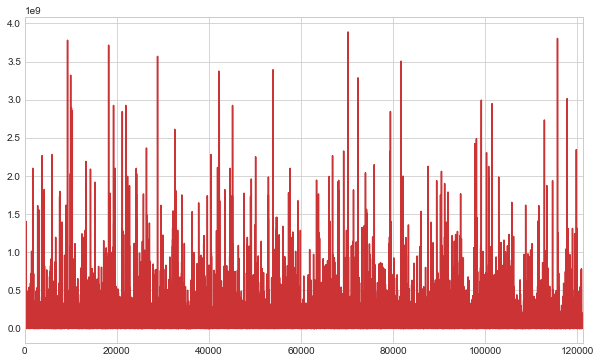

In [13]:
meanSize = df.fileSizeBytes.mean()
medianSize = df.fileSizeBytes.median()


print ("Average file size in MD: %0.2f " % (meanSize / (1024 * 1024)))
print ("Median file size in MD: %0.2f " % (medianSize / (1024 * 1024)))

df.fileSizeBytes.plot(figsize=(10,6))

In [14]:
data['fileSizeInMB'] = df['fileSizeBytes'].apply(lambda x: x / (1024 * 1024))
data.head(10)

,bundleId,trackName,IsUniversal,fileSizeInMB
0,com.aaa.iphone.discounts,AAA Mobile,True,153.721680
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False,29.033732
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True,174.367188
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True,1182.394531
4,com.fmapp2010.ISearchFree,iSheacher,False,1.434688
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True,107.042969
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True,56.867188
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True,32.477539
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True,37.444336
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True,13.113281


### (6) contentAdvisoryRating

4+               91509
17+              12952
12+              11869
9+                4774
Not yet rated        2
Name: contentAdvisoryRating, dtype: int64

Normalized distribution
4+               0.755611
17+              0.106948
12+              0.098005
9+               0.039420
Not yet rated    0.000017
Name: contentAdvisoryRating, dtype: float64


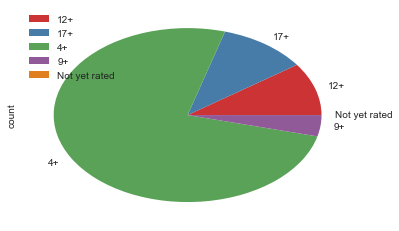

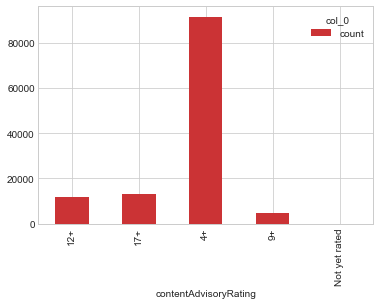

In [15]:
print (df.contentAdvisoryRating.value_counts())
print ()
print ("Normalized distribution")
print (df.contentAdvisoryRating.value_counts(normalize =True))

_ct = pd.crosstab(df.contentAdvisoryRating, "count")
_ct.plot(kind="pie", subplots=True)

_ct.plot(kind="bar")

In [16]:
data['contentAdvisoryRating'] = df['contentAdvisoryRating']

**Summary**: while nearly `75%` is `4+` rated apps other seem to have a meaning full distribution as well;
### (7) genreIds

This feature intutively seem to be highly correlated to `genres` property; So we shall rather look at that in place of this;

### (8) currentVersionReleaseDate
release date of current version; seems an interesting property which doens't need much preprocessing we will keep it as such;

In [17]:
data['currentVersionReleaseDate'] = df.currentVersionReleaseDate

### (9) currency

In [18]:
df.currency.value_counts()

USD    121106
Name: currency, dtype: int64

All values are USD hence we will ignore
### (10) wrapperType

In [19]:
df.wrapperType.value_counts()

software    121106
Name: wrapperType, dtype: int64

all values are software; hence we will ignore
### (11) version

In [20]:
df.version.value_counts().head(20)

1.0      21692
1.1       8447
1.2       5116
2.0       3132
1.3       2933
1.0.1     2626
1.4       2136
1.0.0     1913
1.0.2     1632
1.5       1567
2.1       1487
3.0       1256
1.6       1141
1.0.3     1074
2.2       1000
1.1.0      885
1.7        771
1.0.4      739
1.1.1      732
1.2.1      637
Name: version, dtype: int64

**Summary**
 - This seem to be string like property which can have any value;
 We can maybe extract features like major version and subversions

In [21]:
def getMajorVersion(ver):
    return ver.split('.')[0]

def getMajorSubVersion(ver):
    splt = ver.split('.')
    if len(splt) >= 2:
        return ".".join(splt[0:2])
    return splt[0] +".0"

data['version'] = df['version'].apply(lambda x: getMajorVersion(x))
data['subversion'] = df['version'].apply(lambda x: getMajorSubVersion(x))

data[['bundleId', 'version', 'subversion']].head(10)

,bundleId,version,subversion
0,com.aaa.iphone.discounts,3,3.11
1,com.nextgenreality.gunclublite,1,1.7
2,com.mcgames.chaosstrike2,2,2.0
3,com.BulletParty.BunboGames,1,1.0
4,com.fmapp2010.ISearchFree,1,1.3
5,com.onteca.civilwarlite,4,4.1
6,com.appynation.powertoolsfree,2,2.7
7,com.1361447304.4691361447304,7,7.8
8,com.1443792976.11461443792976,7,7.8
9,com.AnjaneyaApps.AAA1024Free,1,1.2


### (12) artistName

In [22]:
print ("artists with max applications")
df.artistName.value_counts().head(20)

artists with max applications


CrowdCompass, Inc.                      635
eChurch Apps                            398
MINDBODY, Incorporated                  355
Subsplash Inc                           346
DoubleDutch                             320
FMG Suite                               259
KitApps, Inc.                           256
SKOOLBAG PTY LTD                        216
AppsVision                              186
EventMobi                               183
Ketchapp                                176
Andrew Lakin                            158
Tapps Tecnologia da Informação Ltda.    150
ChowNow                                 140
AGT Geocentre                           136
AGN Sports                              135
Sharefaith                              124
Tekk Innovations LLC                    124
TabTale LTD                             121
AHI Infotech                            118
Name: artistName, dtype: int64

In [23]:
data['artist'] = df['artistName']

### (13) artistId:
might is highly correlated to artistName and hence will ignore

### (14) genres
This is one of very important property; Let's do some analysis here

In [24]:
import json
genres = {}
for genreString in df.genres.values:
    gs = json.loads(genreString)
    for g in gs:
        if g not in genres:
            genres[g] = 0
        genres[g] = genres[g] + 1

In [25]:
gdf = pd.DataFrame([[k,v] for k,v in genres.items()], columns=['genre', 'count'])
gdf.head(10)

,genre,count
0,Racing,2649
1,Action,6032
2,Health & Fitness,7177
3,Utilities,14931
4,Eating & Drinking,22
5,Casino,1388
6,Shopping,2887
7,Simulation,4515
8,Art,70
9,Education,17266


In [26]:
gs = gdf.sort_values(["count"], axis=0, ascending=False)

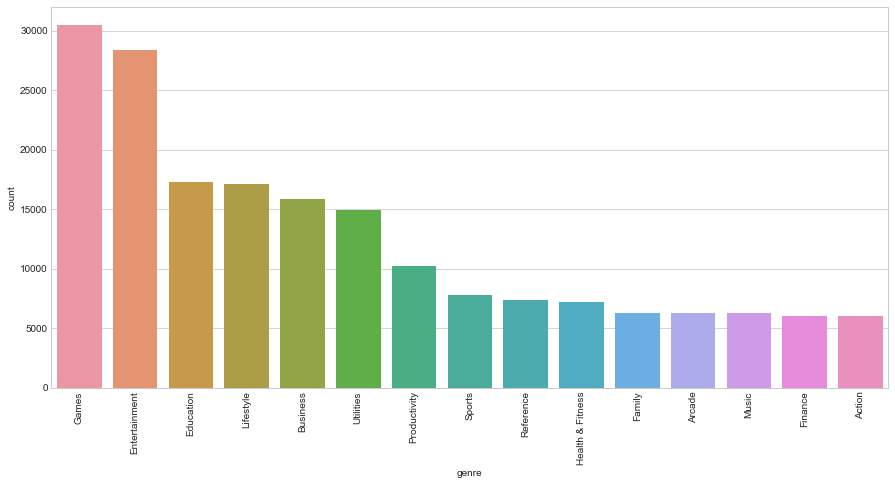

In [27]:
plt.figure(figsize=(15, 7))
fx = sns.barplot(x='genre', y='count', data=gs.head(15))
fx.set_xticklabels(rotation=90, labels=gs['genre'])

In [28]:
data['genres'] = df['genres']
data.head(10)

,bundleId,trackName,IsUniversal,fileSizeInMB,contentAdvisoryRating,currentVersionReleaseDate,version,subversion,artist,genres
0,com.aaa.iphone.discounts,AAA Mobile,True,153.721680,4+,2017-12-19T13:23:36Z,3,3.11,American Automobile Association,"[""Lifestyle"", ""Travel""]"
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False,29.033732,9+,2009-11-07T02:12:31Z,1,1.7,Gun Club Studios,"[""Entertainment"", ""Games"", ""Simulation"", ""Acti..."
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True,174.367188,12+,2016-06-13T17:52:01Z,2,2.0,Hasim Mert Corekci,"[""Games"", ""Arcade"", ""Action""]"
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True,1182.394531,17+,2015-04-22T15:01:15Z,1,1.0,Engin Yildiz,"[""Games"", ""Arcade"", ""Action""]"
4,com.fmapp2010.ISearchFree,iSheacher,False,1.434688,17+,2011-11-23T01:52:45Z,1,1.3,feng min,"[""Photo & Video"", ""Utilities""]"
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True,107.042969,9+,2015-06-29T16:38:41Z,4,4.1,Onteca,"[""Games"", ""Entertainment"", ""Strategy"", ""Simula..."
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True,56.867188,4+,2016-01-12T23:42:31Z,2,2.7,Onteca,"[""Games"", ""Photo & Video"", ""Trivia"", ""Board""]"
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True,32.477539,4+,2017-05-12T22:18:51Z,7,7.8,NHC PUBLISHING PTY. LTD,"[""Business"", ""Magazines & Newspapers""]"
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True,37.444336,17+,2017-02-14T21:57:51Z,7,7.8,azacreations,"[""Magazines & Newspapers"", ""Sports""]"
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True,13.113281,4+,2014-05-28T07:00:00Z,1,1.2,Bharat Bhushan,"[""Games"", ""Puzzle"", ""Entertainment"", ""Family""]"


### (15) Price
One of most important field

In [29]:
percentageFree = df[df.price == 0].shape[0] / df.shape[0] * 100

print ("%% Free: %0.3f %%" % percentageFree)

% Free: 89.879 %


In [31]:
data['price'] = df['price']

In [33]:
paidApps = df[df.price > 0]

### In progress more to be added